In [ ]:
import sys
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors

# silence warnings
import warnings

warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
from tesorai_search import data_parsing_utils

In [2]:
_DATA_DIR = "../data/benchmark_results/"
_BENCHMARKS = [
    "bekker_jensen",
    "bassani_sternberg",
    "nowatzky",
    "williams/1_cells",
    "williams/3_cells",
    "williams/10_cells",
    "williams/50_cells",
]


def get_benchmark_results(benchmark):
    benchmark_results = {
        "MaxQuant": set(
            data_parsing_utils.get_maxquant_peptides(
                _DATA_DIR + f"{benchmark}/maxquant/"
            )
        ),
        "Proteome Discoverer": set(
            data_parsing_utils.get_pd_peptides(
                _DATA_DIR + f"{benchmark}/proteome_discoverer/peptides.xlsx"
            )
        ),
        "FragPipe": set(
            data_parsing_utils.get_fragpipe_peptides(
                _DATA_DIR + f"{benchmark}/fragpipe/peptides.tsv"
            )
        ),
        "PEAKS": set(
            data_parsing_utils.get_peaks_peptides(
                _DATA_DIR + f"{benchmark}/peaks/peptides.csv"
            )
        ),
        "Tesorai": set(
            data_parsing_utils.get_tesorai_peptides(
                _DATA_DIR + f"{benchmark}/tesorai/pep_fdr.csv"
            )
        ),
    }
    return benchmark_results

In [3]:
all_peptides = {}
for benchmark in _BENCHMARKS:
    all_peptides[benchmark] = get_benchmark_results(benchmark)

Found 169476 peptides by maxquant from 436857 unique rows
Found 190362 peptides by PD from 207171 unique rows
Found 174795 peptides by fragpipe from 174795 unique rows
Found 170604 peptides by PEAKS from 187147 unique rows
Found 183147 peptides by TS
Found 22166 peptides by maxquant from 182392 unique rows
Found 35882 peptides by PD from 37941 unique rows
Found 39410 peptides by fragpipe from 39410 unique rows
Found 44396 peptides by PEAKS from 49774 unique rows
Found 47393 peptides by TS
Found 3677 peptides by maxquant from 6544 unique rows
Found 8333 peptides by PD from 8906 unique rows
Found 10848 peptides by fragpipe from 10848 unique rows
Found 11255 peptides by PEAKS from 12198 unique rows
Found 11787 peptides by TS
Found 1626 peptides by maxquant from 1626 unique rows
Found 1964 peptides by PD from 1979 unique rows
Found 1910 peptides by fragpipe from 1910 unique rows
Found 1892 peptides by PEAKS from 1941 unique rows
Found 2472 peptides by TS
Found 2758 peptides by maxquant fro

In [4]:
counts = {}
for benchmark, results in all_peptides.items():
    counts_per_search_engine = {
        search_engine: len(peptides) for search_engine, peptides in results.items()
    }
    counts_per_search_engine["union"] = len(set.union(*results.values()))
    counts[benchmark] = counts_per_search_engine

raw_table = pd.DataFrame(counts).T
raw_table

,MaxQuant,Proteome Discoverer,FragPipe,PEAKS,Tesorai,union
bekker_jensen,169476,190362,174795,170604,183147,224741
bassani_sternberg,22166,35882,39410,44396,47393,57935
nowatzky,3677,8333,10848,11255,11787,14107
williams/1_cells,1626,1964,1910,1892,2472,2761
williams/3_cells,2758,3435,3611,4048,4301,5114
williams/10_cells,4488,5382,5620,6130,6614,7766
williams/50_cells,7890,10482,10720,12285,13030,15472


In [5]:
normalized_raw_table = raw_table.div(raw_table["union"], axis=0)
# Display only 2 significant digits
pd.options.display.float_format = "{:,.0f}%".format

normalized_raw_table * 100

,MaxQuant,Proteome Discoverer,FragPipe,PEAKS,Tesorai,union
bekker_jensen,75%,85%,78%,76%,81%,100%
bassani_sternberg,38%,62%,68%,77%,82%,100%
nowatzky,26%,59%,77%,80%,84%,100%
williams/1_cells,59%,71%,69%,69%,90%,100%
williams/3_cells,54%,67%,71%,79%,84%,100%
williams/10_cells,58%,69%,72%,79%,85%,100%
williams/50_cells,51%,68%,69%,79%,84%,100%


In [6]:
# Custom CMAP
# 1. Get the original colormap
original_cmap = plt.get_cmap("RdBu")

# 2. Define anchor points and sample original colors at key locations
# We need the Red at 0.0, orange at 0.5, and Green at 1.0 from the original map
nodes = [0.0, 0.1, 0.45, 0.70, 0.8, 0.9, 1.0]
colors_at_key_points = original_cmap([0.0, 0.25, 0.5, 0.75, 1.0])  # Get RGBA values

# Define the colors corresponding to our desired nodes
node_colors = [
    colors_at_key_points[0],
    colors_at_key_points[0],
    colors_at_key_points[1],
    colors_at_key_points[2],
    colors_at_key_points[3],
    colors_at_key_points[4],
    colors_at_key_points[4],
]

# 3. Construct the colormap dictionary (cdict)
# Each color channel (red, green, blue) needs its own list of anchor points.
cdict = {"red": [], "green": [], "blue": []}  # Alpha is ignored here but could be added

for i, node in enumerate(nodes):
    rgba = node_colors[i]
    cdict["red"].append((node, rgba[0], rgba[0]))
    cdict["green"].append((node, rgba[1], rgba[1]))
    cdict["blue"].append((node, rgba[2], rgba[2]))

# 4. Create the new custom colormap
custom_cmap = mcolors.LinearSegmentedColormap("custom_RdYlGn", cdict)

In [7]:
df = normalized_raw_table * 100
df.drop("union", axis=1, inplace=True)
# Create average row at the bottom
df.loc["Average"] = df.mean()

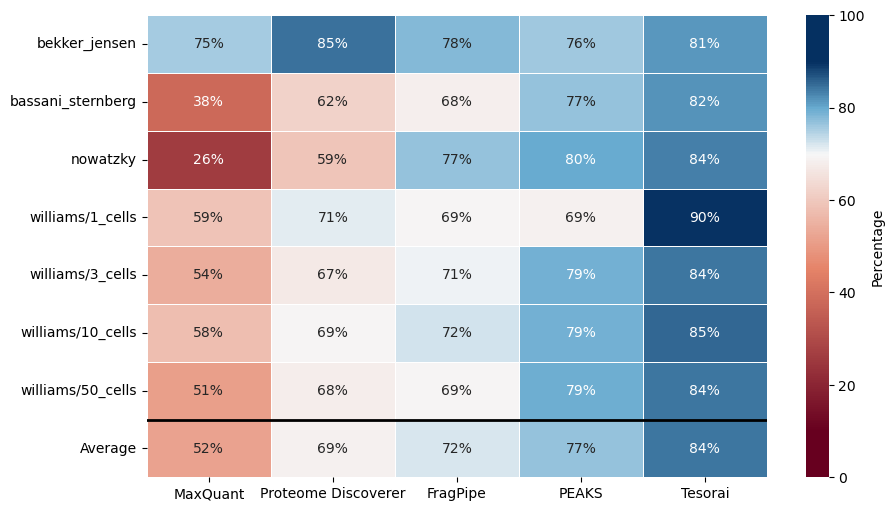

In [8]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    df,
    annot=df.applymap(lambda x: f"{x:.0f}%" if not pd.isna(x) else ""),
    cmap=custom_cmap,
    cbar=True,
    cbar_kws={"label": "Percentage"},
    fmt="",
    linewidths=0.5,
    vmin=0,
    vmax=100,
)

# Add a line to separate the last row
plt.axhline(y=len(df) - 1, color="black", linewidth=2)

cbar = plt.gca().collections[0].colorbar
plt.show()